# Lab Assignment One: Exploring Table Data

Gabs DiLiegro, London Kasper, Carys LeKander

# 1. Business Understanding

Housing prices are a large topic of interest for many people around the world. A person's home and environment can greatly affect their life and mental state. Being able to predict housing costs could help buyers and sellers in the housing market as people looking to buy a house could use this model to see what factors drive prices up and be able to stay in their price range and sellers could get an accurate estimate of how much their home is worth. 

Our dataset is centered around housing in neighborhoods around Melbourne, Australia. This data was collected from public records posted on Domain.com.au, and the prediction task associated with this dataset is the price of the housing. This dataset has 13580 entries with 21 attributes for each observation. The data appeared to be ordered by the Suburb attribute in alphabetical order. We found this dataset at kaggle.com. 

With our visualizations and analysis, we are able to show the most important factors in determining the price of a house and eventually will be able to predict the price based on these factors. 

We believe that the accuracy of our model would need to be a high percentage to be accepted by users because there are many algorithms about predicting housing prices that currently exist with high accuracy. When looking online, we found multiple tools built to forecast prices of homes (ex. VeroFORECAST) and research papers about machine learning for predicitng housing costs (ex. one we found claims 86% accuracy). 

Dataset: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

******************************************************

VeroFORCAST: https://www.veros.com/solutions/home-price-trends-and-forecast/veroforecast

Reasearch paper example: https://www.ijert.org/comparison-of-machine-learning-algorithms-for-house-price-prediction-using-real-time-data


# 2. Data Understanding

In [33]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import warnings
import missingno as mn
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

df = pd.read_csv('melb_data.csv')

df.head(5) 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.tail() #Showing the raw dataset's ordering alphabetically by Suburb 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [3]:
#find data types and missing data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [34]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Data Quality Check

In [37]:
#checking for duplicated data
idx = df.duplicated()
print(len(df[idx])==0)

True


We found no duplicated data in our dataset as shown above.

Text(0.5, 1.0, 'Nullity Matrix')

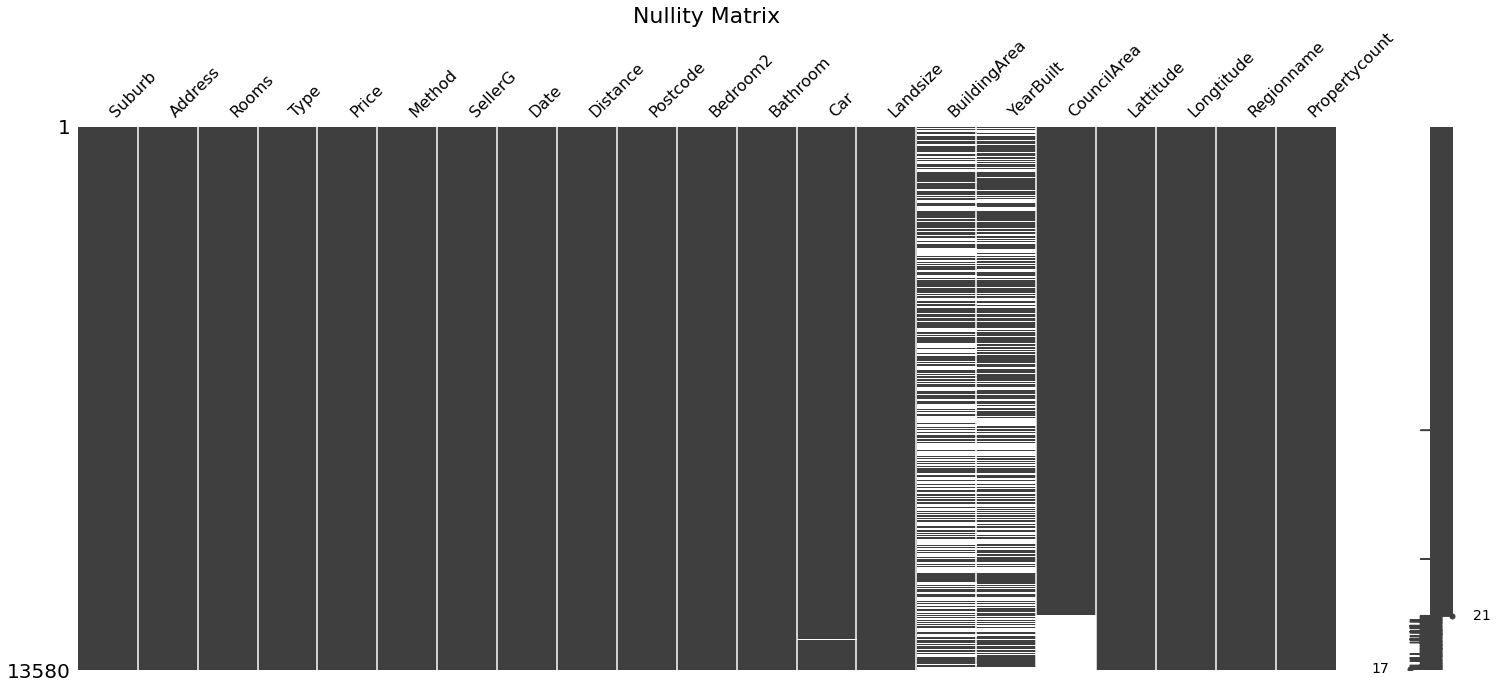

In [2]:
mn.matrix(df)
plt.title("Nullity Matrix",fontsize=22)

This graph displays all of the variables and which instances (as marked on the far left) have null attributes. The dataset is mostly non-null values, but the attributes BuildingArea, CouncilArea and YearBuilt appear to have quite a bit of missing information.
<br><br>One particularly interesting thing to note is that the information for the CouncilArea attribute is fully null after a specific number of observations-- perhaps due to the way of collecting the information? This doesn't necessarily have to be the case as there is no reason that all of the observations would be in order by date. Let's change that and see what happens.


In [3]:
from datetime import date
from datetime import datetime
#time = datetime.min.time() #no time data provided, default is 00:00:00
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df = df.sort_values(by='Date')
df['Date'].describe #The Date column has been changed to a datetime64 data type and we can now see the range of our values!

<bound method NDFrame.describe of 6184    2016-01-28
6183    2016-01-28
4029    2016-02-04
7168    2016-02-04
4709    2016-02-04
           ...    
13244   2017-09-23
13243   2017-09-23
13242   2017-09-23
13240   2017-09-23
13119   2017-09-23
Name: Date, Length: 13580, dtype: datetime64[ns]>

Text(0.5, 1.0, 'Sorted by Date')

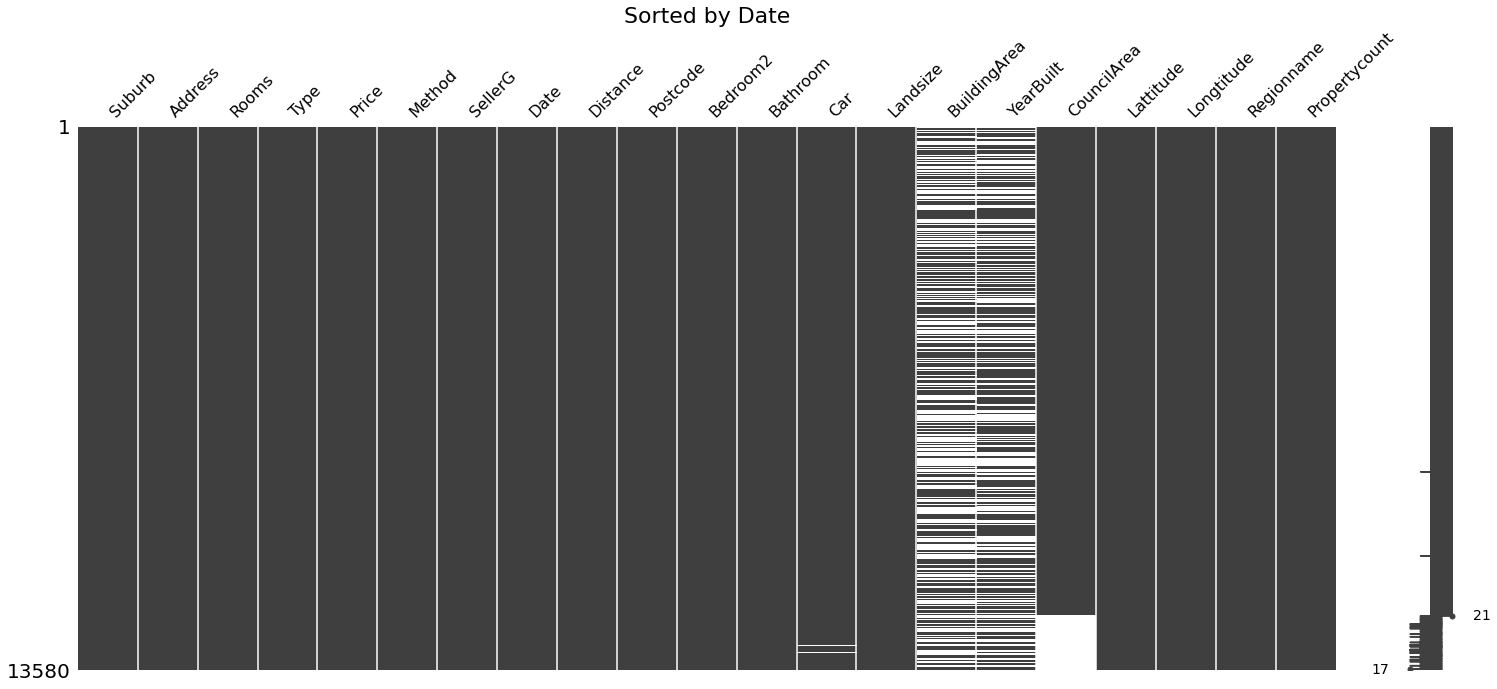

In [4]:
mn.matrix(df)
plt.title("Sorted by Date",fontsize=22)

This looks almost exactly like the last nullity matrix, except there are a few subtle changes in the line patterns for BuildingArea and YearBuilt. We can also visually see that there is actually more than 1 null value for the Car attribute, and that they were recorded at different times. However, we were correct in assuming that the CouncilArea data stopped being recorded at some point in time. This lack of information would be problematic except that the CouncilArea is likely determined by other information that we do have, such as Postcode, Suburb, or the Regionname. We will handle this in the future. For now, we have determined that the Address, SellerG, Date and Propertycount attributes are unnecessary to the task at hand, so we can remove the information from our dataframe. 

In [38]:
# removing irrelevant columns 
df = df.drop(['Address','Method','SellerG', 'Date','Bedroom2', 'Propertycount','BuildingArea', 'YearBuilt','CouncilArea','Lattitude','Longtitude'], axis=1)

# Data Dictionary 
### Attributes used for visualizations
- Suburb: the name of the suburb that each property is in. (String object)
- Rooms: the total number of rooms for each property. (int64)
- Type: the type of property. (String object: br = bedrooms; h = house/cottage/villa/seni/terrace; u = unit, duplex; t = townhouse; dev site = development site; ores = other residential)
- Price: listing price in Australian dollars (float64)
- Distance: the distance from the property to the Melbourne central business district AKA CBD (float64)
- Postcode: zipcode the property falls within (float64) 
- Bathroom: the number of bathrooms (float64)
- Car: the number of parking spots (float64)
- Landsize: the size of the land in meters (float64)
- Regionname: general region of the property (String object)

### Attributes removed from final visualizations  and why:<br>
- Address: the address of the property (String object)
- Method: way the property was listed
- SellerG: name of the real estate agent listing the property (String object)
- Date: sale date in mm/dd/yyyy (float64)
- Bedroom2: the number of bedrooms (float64: scraped from a different source)
- Propertycount: number of properties in the same suburb (float64)
- BuildingArea: area of the building in meters
    - Since ~47% of the dataset is missing this we decided to remove it
- YearBuilt: year the house was built (float64)
    - Although we think YearBuilt could have useful infomation for our model, ~40% of the data is missing so we have decided to remove it
- CouncilArea: the governing council for the area (String object)
    - As we showed above, the CouncilArea stopped being recorded after a certain date. Therefore we decided to remove this attribute as we did not want it to skew our set
- Lattitude: lattitude of property (float64)
- Longtitude: longtitude of property (float64)

There are quite a few variables that are categorical, but aren't classified as such. We will change them to a pandas 'category' data type.

In [39]:
df['Suburb'] = pd.Categorical(df.Suburb)
# df['Rooms'] = pd.Categorical(df.Rooms)
df['Type'] = pd.Categorical(df.Type)
#df['Method'] = pd.Categorical(df.Method)
df['Postcode'] = pd.Categorical(df.Postcode)
# df['Bedroom2'] = pd.Categorical(df.Bedroom2)
# df['Bathroom'] = pd.Categorical(df.Bathroom)
# df['Car'] = pd.Categorical(df.Car)
#df['CouncilArea'] = pd.Categorical(df.CouncilArea)
df['Regionname'] = pd.Categorical(df.Regionname)

#fill in missing numeric values with median
#Fills in Car
df = df.fillna(df.median())
#print(df.isnull().sum())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Suburb      13580 non-null  category
 1   Rooms       13580 non-null  int64   
 2   Type        13580 non-null  category
 3   Price       13580 non-null  float64 
 4   Distance    13580 non-null  float64 
 5   Postcode    13580 non-null  category
 6   Bathroom    13580 non-null  float64 
 7   Car         13580 non-null  float64 
 8   Landsize    13580 non-null  float64 
 9   Regionname  13580 non-null  category
dtypes: category(4), float64(5), int64(1)
memory usage: 736.9 KB


# 3. Data Visualization

In [9]:
df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

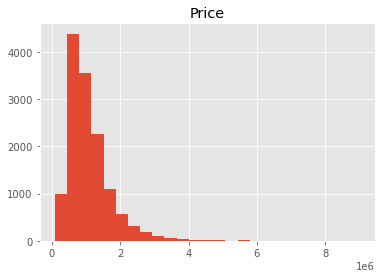

In [40]:
df.hist('Price', bins = 25)

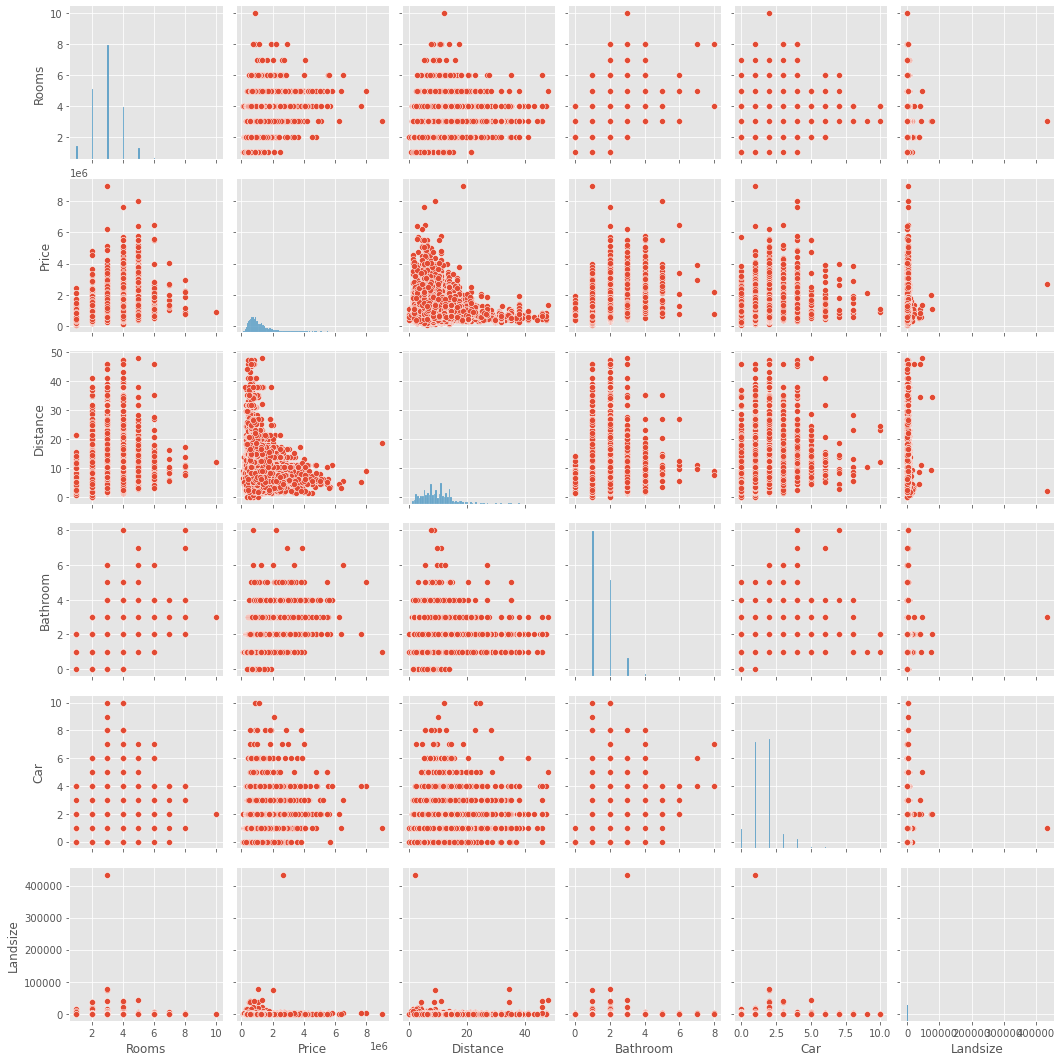

In [41]:
sns.pairplot(df)
#test = sns.pairplot(df, vars=['Price', 'Rooms', 'Bathroom', 'Landsize', 'Regionname', 'Type'])

This pairplot serves to point out some unexpected relationships in our data at a glance. 

<Figure size 1440x1080 with 0 Axes>

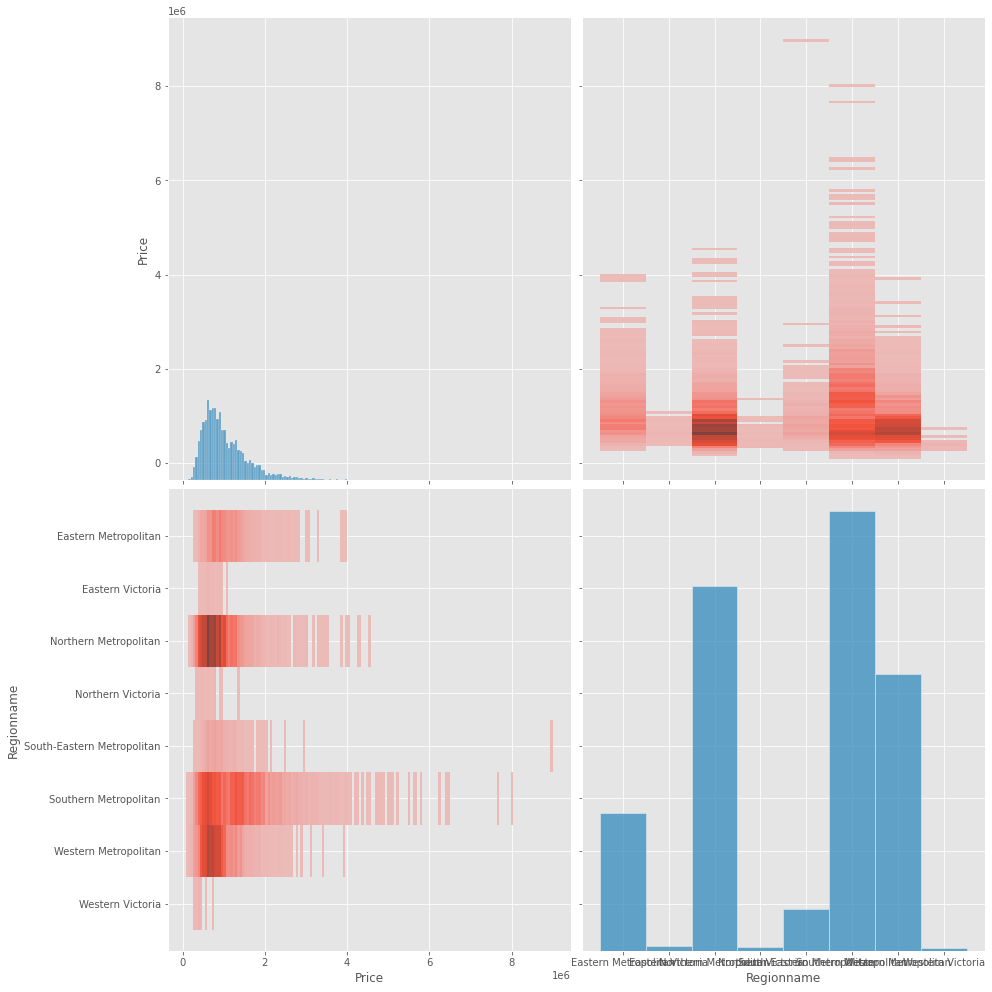

In [28]:
plt.figure(figsize = (20,15))
sns.pairplot(df, vars=['Price', 'Regionname'], height=7,  aspect =1, kind="hist")

<AxesSubplot:xlabel='Car', ylabel='Rooms'>

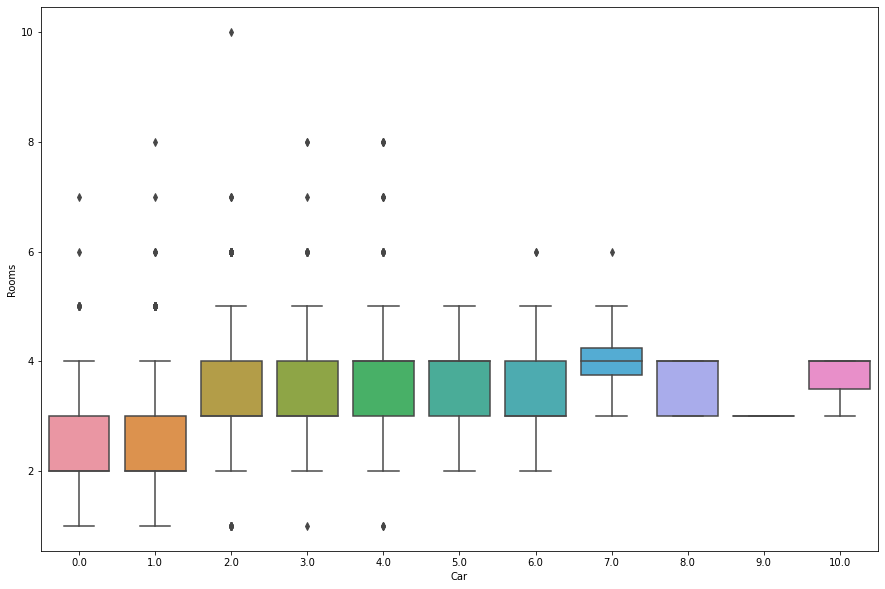

In [21]:
plt.figure(figsize = (15,10))
sns.boxplot(data=df,x = 'Car', y = 'Rooms')

## Question 1: What is the most important feature in determining the price of a house?

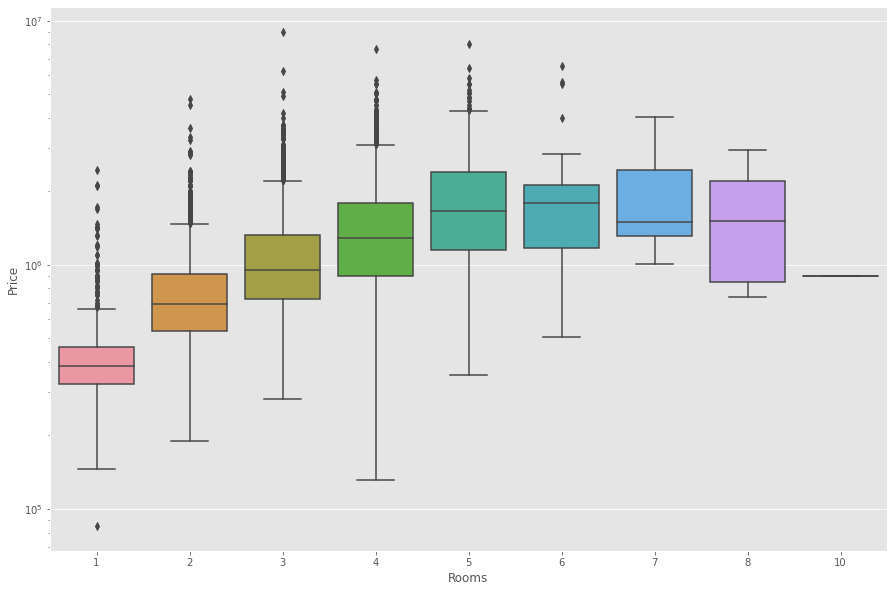

In [55]:
plt.figure(figsize = (15,10))
tempPlt = sns.boxplot(data=df,x = 'Rooms', y = 'Price')
tempPlt.set_yscale('log')

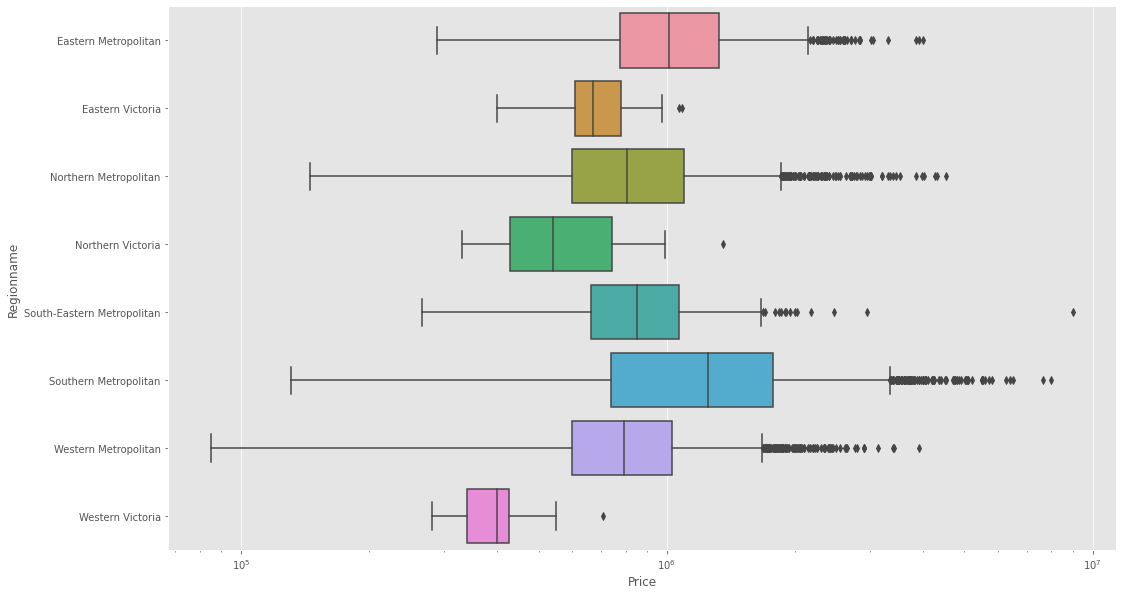

In [56]:
plt.figure(figsize = (17,10))
tempPlt = sns.boxplot(data=df,x = 'Price', y = 'Regionname')
tempPlt.set_xscale('log')

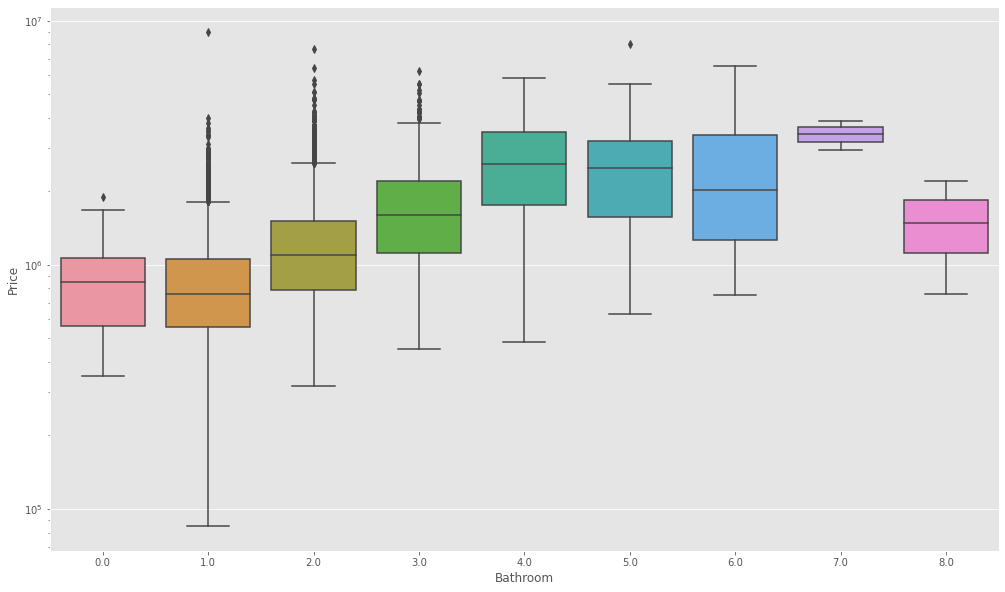

In [61]:
plt.figure(figsize = (17,10))
tempPlt = sns.boxplot(data=df,x = 'Bathroom', y = 'Price')
tempPlt.set_yscale('log')

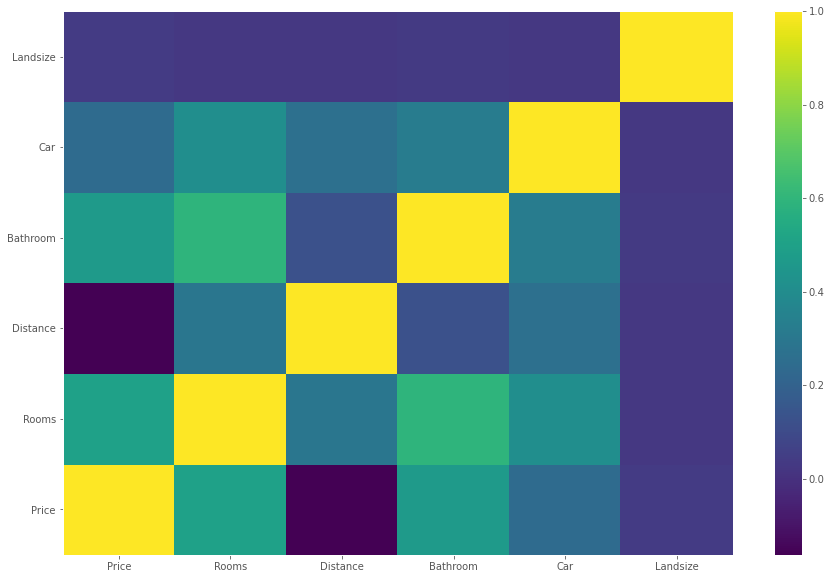

In [62]:
#correlation matrix
vars_to_use = ['Price', 'Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize']
plt.figure(figsize=(15, 10))
plt.pcolor(df[vars_to_use].corr()) 
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()

plt.show()

From the correlation matrix, we can see that for 

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

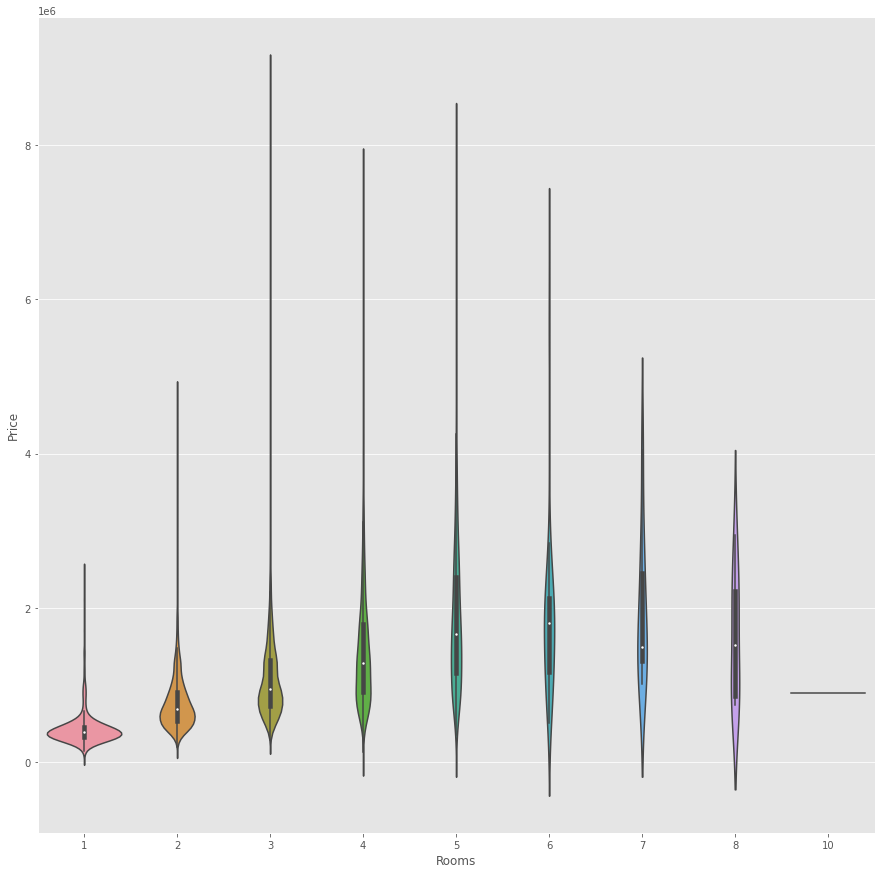

In [27]:
plt.figure(figsize=(15, 15))
sns.violinplot(x="Rooms", y="Price", data=df)

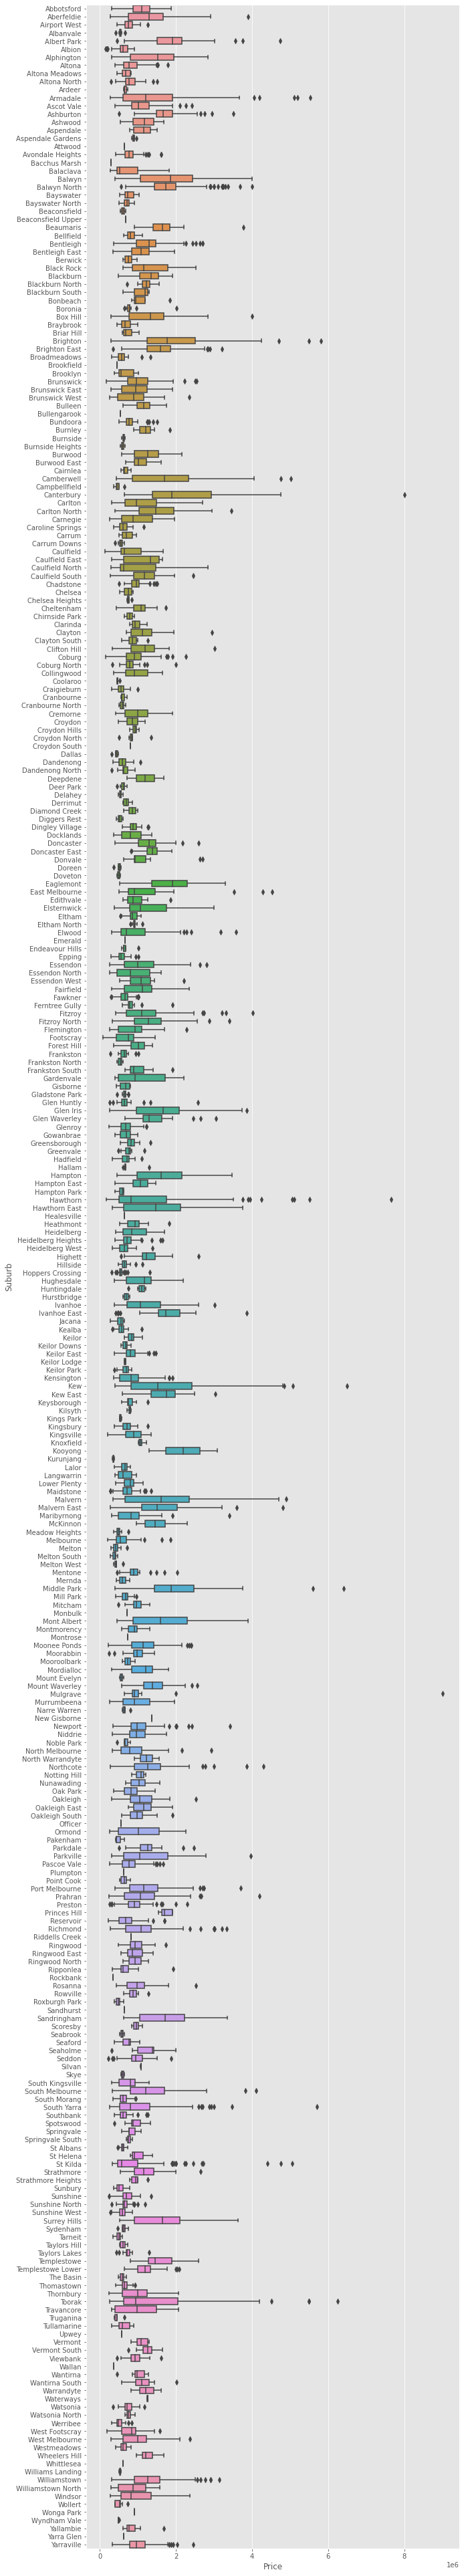

In [48]:
plt.figure(figsize = (10,70))
tempPlt = sns.boxplot(data=df,x = 'Price', y = 'Suburb')

In [52]:
test = pd.crosstab([df['Regionname'], df['Suburb']])
plt = sns.boxplot( x=df.Price, y=test)

TypeError: crosstab() missing 1 required positional argument: 'columns'

# 4. Exceptional Work

In [35]:
import umap.umap_
reduction = umap.UMAP(random_state=42)
df_data = df[['Price', 'Rooms', 'Bedroom2', 'Distance', 'Postcode', 'Bathroom', 'Landsize']].values
reduction.fit(df_data)


#scaled_df = StandardScaler().fit_transform(df_data)

C:\Users\Owner\anaconda3\envs\mlenvPy3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [38]:
#embedding = reduction.fit_transform(scaled_df)
embedding = reduction.transform(df_data)
# asert(np.all(embedding == reduction.embedding_))
embedding.shape

(13580, 2)

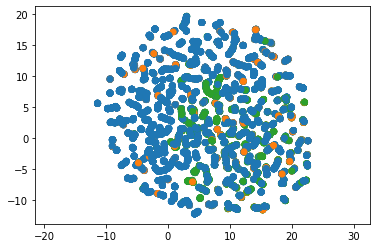

In [39]:
plt.scatter(embedding[:,0], embedding[:, 1],c=[sns.color_palette()[x] for x in df.Type.map({"h":0, "t":1, "u":2})])
plt.gca().set_aspect('equal', 'datalim')